In [1]:
import QuenchedRandomness as qr
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_legendre

In [2]:
import RenormGroupFunctions as rg

In [116]:
f = rg.lfc_initialize(5,49)
af = rg.lfc_initialize(-5,49)

In [6]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
x2 = np.linspace(-2*np.pi, 2*np.pi, 1001)

def expansion(gamma, c):
    val = 0
    for l in range(len(c)):
        val += c[l] * eval_legendre(l, np.cos(gamma))
    return val

In [97]:
f = qr.rgTrajectory(J=10, p=.2, n=9, dim=3, pool_size=1000, l_prec=49, rg_step=1)

In [98]:
f[1][545]

array([-1.67842016e-01,  5.57977659e-01, -7.43787189e-01,  1.00000000e+00,
       -9.71415339e-01,  9.64082382e-01, -7.91369247e-01,  6.27814835e-01,
       -4.39339378e-01,  2.87783380e-01, -1.70935163e-01,  9.39454742e-02,
       -4.73549641e-02,  2.20432341e-02, -9.45257196e-03,  3.72683426e-03,
       -1.32577879e-03,  3.89976097e-04, -3.58251740e-05, -1.24873154e-04,
        2.57478815e-04, -4.35264176e-04,  6.93764465e-04, -1.04827807e-03,
        1.49510681e-03, -2.00777069e-03,  2.53551108e-03, -3.00870750e-03,
        3.35240819e-03, -3.50506673e-03,  3.43625726e-03, -3.15642593e-03,
        2.71441779e-03, -2.18351232e-03,  1.64145576e-03, -1.15200603e-03,
        7.53940180e-04, -4.59523982e-04,  2.60437984e-04, -1.37004156e-04,
        6.67488654e-05, -3.00391791e-05,  1.24479411e-05, -4.73219235e-06,
        1.64331254e-06, -5.18733992e-07,  1.48021928e-07, -3.79439086e-08,
        8.67652012e-09])

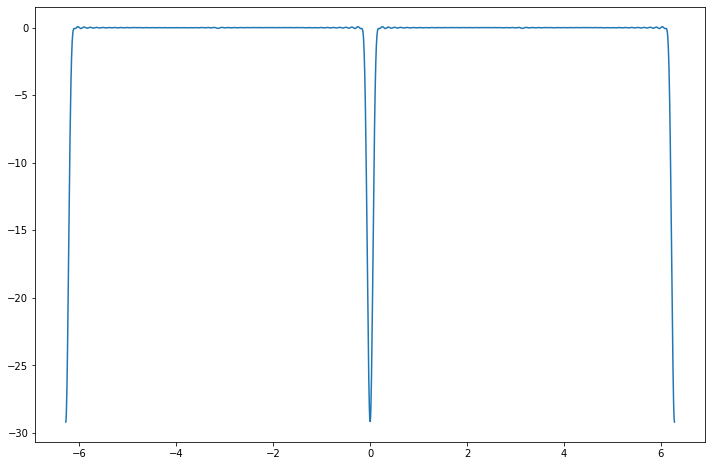

In [25]:
coef = f[-1][99]
fig = plt.figure(figsize=(12,8), dpi=72, facecolor='w', edgecolor='k')
plt.plot(x, expansion(x,coef))

In [125]:
q = np.arange(49)
lambdas =  ((2*q+1)/2) * eval_legendre(q,1)  + ((2*q+1)/2) * eval_legendre(q,-1)

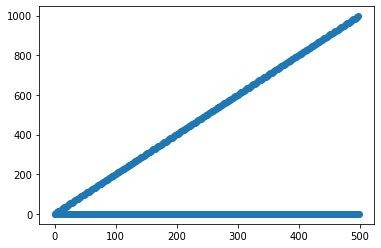

In [8]:
plt.scatter(q,lambdas)

In [10]:
a = np.array([-3.80438901e-29,  1.30505095e-28, -1.85228538e-28,  2.73603262e-28,
 -3.01292937e-28,  3.49739304e-28, -3.46432079e-28,  3.42149689e-28,
 -3.07494979e-28,  2.66827982e-28, -2.16552020e-28,  1.67713703e-28,
 -1.22849239e-28,  8.56843035e-29, -5.67608256e-29,  3.56378254e-29,
 -2.08092849e-29,  1.03543228e-29, -1.65801978e-30, -1.03787042e-29,
  3.95891080e-29, -1.27516140e-28,  3.98793852e-28, -1.21733368e-27,
  3.61076586e-27, -1.03789998e-26,  2.88710867e-26, -7.76418865e-26,
  2.01684678e-25, -5.05605413e-25,  1.22212942e-24, -2.84561603e-24,
  6.37610288e-24, -1.37339690e-23,  2.84059878e-23, -5.63467058e-23,
  1.07050942e-22, -1.94501175e-22,  3.37375351e-22, -5.57553680e-22,
  8.75801560e-22, -1.30390019e-21,  1.83386255e-21, -2.42731885e-21,
  3.01090032e-21, -3.48441647e-21,  3.74513706e-21, -3.72278361e-21,
  3.40999757e-21])

b = a / max(abs(a))

In [123]:
c1 = rg.bond_move(f,af,len(f))
c1 = c1 / np.max(c1)
c2 = rg.bond_move(c1,f,len(f))
c2 = c2 / np.max(c2)
c3 = rg.bond_move(c2,f,len(f))
c3 = c3 / np.max(c3)
c4 = rg.bond_move(c3,f,len(f))
c4 = c4 / np.max(c4)
c5 = rg.bond_move(c4,af,len(af))
c5 = c5 / np.max(c5)
c6 = rg.bond_move(c5,af,len(af))
c6 = c6 / np.max(c6)
c7 = rg.bond_move(c6,af,len(af))
c7 = c7 / np.max(c7)
c8 = rg.bond_move(c7,af,len(af))
c8 = c8 / np.max(c8)

cs = rg.bond_move(rg.lfc_initialize(100,49),rg.lfc_initialize(-100,49),len(af))
cs = cs / np.max(abs(cs))

csf = cs**2/(2*np.arange(len(cs))+1)
csf = csf / np.max(abs(csf))

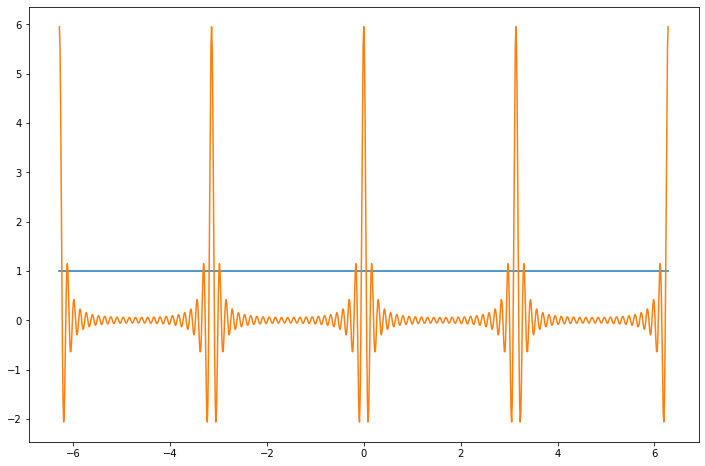

In [127]:
fig = plt.figure(figsize=(12,8), dpi=72, facecolor='w', edgecolor='k')
plt.plot(x,expansion(x,rg.lfc_initialize(0,49)))
plt.plot(x2,expansion(x2,cs))